<a href="https://colab.research.google.com/github/Altukhov-Vladislav/CPP/blob/main/simpleNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [3]:
input_train = np.array([[0, 1, 0], [0, 1, 1], [0, 0, 0], 
                        [10, 0, 0], [10, 1, 1], [10, 0, 1]])
output_train = np.array([[0], [0], [0], [1], [1], [1]])
input_pred = np.array([1, 1, 0])
input_test = np.array([[1, 1, 1], [10, 0, 1], [0, 1, 10], 
                       [10, 1, 10], [0, 0, 0], [0, 1, 1]])
output_test = np.array([[0], [1], [0], [1], [0], [0]])

In [4]:
scaler = MinMaxScaler()
input_train_scaled = scaler.fit_transform(input_train)
output_train_scaled = scaler.fit_transform(output_train)
input_test_scaled = scaler.fit_transform(input_test)
output_test_scaled = scaler.fit_transform(output_test)

In [5]:
class NeuralNetwork():
    def __init__(self, ):
        self.inputSize = 3
        self.outputSize = 1
        self.hiddenSize = 3

        self.W1 = np.random.rand(self.inputSize, self.hiddenSize)
        self.W2 = np.random.rand(self.hiddenSize, self.outputSize)

        self.error_list = []
        self.limit = 0.5
        self.true_positives = 0
        self.false_positives = 0
        self.true_negatives = 0
        self.false_negatives = 0

    def forward(self, X):
        self.z = np.matmul(X, self.W1)
        self.z2 = self.sigmoid(self.z)
        self.z3 = np.matmul(self.z2, self.W2)
        o = self.sigmoid(self.z3)
        return o

    def sigmoid(self, s):
        return 1 / (1 + np.exp(-s))

    def sigmoidPrime(self, s):
        return s * (1 - s)

    def backward(self, X, y, o):
        self.o_error = y - o
        self.o_delta = self.o_error * self.sigmoidPrime(o)
        self.z2_error = np.matmul(self.o_delta,
                                  np.matrix.transpose(self.W2))
        self.z2_delta = self.z2_error * self.sigmoidPrime(self.z2)
        self.W1 += np.matmul(np.matrix.transpose(X), self.z2_delta)
        self.W2 += np.matmul(np.matrix.transpose(self.z2),
                             self.o_delta)

    def train(self, X, y, epochs):
        for epoch in range(epochs):
            o = self.forward(X)
            self.backward(X, y, o)
            self.error_list.append(np.abs(self.o_error).mean())

    def predict(self, x_predicted):
        return self.forward(x_predicted).item()

    def view_error_development(self):
        plt.plot(range(len(self.error_list)), self.error_list)
        plt.title('Mean Sum Squared Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')

    def test_evaluation(self, input_test, output_test):
        for i, test_element in enumerate(input_test):
            if self.predict(test_element) > self.limit and \
                    output_test[i] == 1:
                self.true_positives += 1
            if self.predict(test_element) < self.limit and \
                    output_test[i] == 1:
                self.false_negatives += 1
            if self.predict(test_element) > self.limit and \
                    output_test[i] == 0:
                self.false_positives += 1
            if self.predict(test_element) < self.limit and \
                    output_test[i] == 0:
                self.true_negatives += 1
        print('True positives: ', self.true_positives,
              '\nTrue negatives: ', self.true_negatives,
              '\nFalse positives: ', self.false_positives,
              '\nFalse negatives: ', self.false_negatives,
              '\nAccuracy: ',
              (self.true_positives + self.true_negatives) /
              (self.true_positives + self.true_negatives +
               self.false_positives + self.false_negatives))

True positives:  2 
True negatives:  4 
False positives:  0 
False negatives:  0 
Accuracy:  1.0


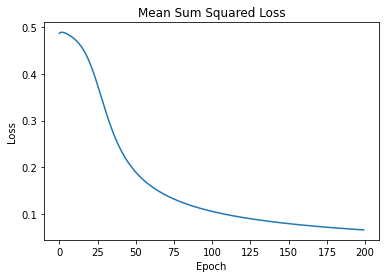

In [6]:
NN = NeuralNetwork()
NN.train(input_train_scaled, output_train_scaled, 200)
NN.predict(input_pred)
NN.view_error_development()
NN.test_evaluation(input_test_scaled, output_test_scaled)